In [21]:
import networkx as nx
import numpy as np
import scipy as sp
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities
from community import community_louvain
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [5]:
G0 = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)

#removing the prefix in proteins
map_dic = {}

for node in G0.nodes() :
    map_dic[node] = node[5:]
   
G = nx.relabel_nodes(G0, map_dic)
essential_proteins = pd.read_csv("yeast essential proteins.csv", header=None)[1]
G.remove_nodes_from(essential_proteins)
# delete those edges with a combined score of <= threshold_score (small confidence)
threshold_score = 500
for edge in G.edges: 
    weight = list(G.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G.remove_edge(edge[0],edge[1])
print("Number of edges after filtering over low score", len(G.edges))

Number of edges after filtering over low score 99189


In [30]:
A =nx.adjacency_matrix(G)
node_list = list(G.nodes())

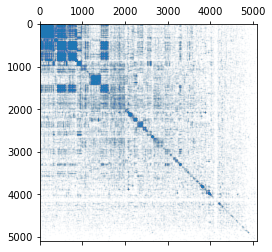

In [73]:
plt.spy(A, markersize=0.01)

In [95]:
sc = SpectralClustering(18, affinity='precomputed', n_init=10).fit(A) #finding 18 community 

/Users/gaspard/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [96]:
l = []
i=0
for lab in sc.labels_:
    i+=1
    if lab in l:
        pass
    else:
        l.append(lab)
print(l)
print(i)
len(G.nodes)

[9, 4, 14, 15, 17, 0, 16, 12, 2, 8, 10, 13, 5, 7, 6, 3, 1, 11]
5098


5098

We can see that sc.labels_ contains the community number for each node in the dataset